# Dataset 1

In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = settings["DATASET"]["dataset"]
project_name = settings["RUN"]["project_name"]

In [16]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    df.drop(columns=['Non-GBR'], inplace=True)
    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()


Run project explor for data 5g-network-slicing-analysis
Num cols: 15. Num rows: 31583. Num classes: 3
Name cols: Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0',
       'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone'],
      dtype='object')
Target col: slice Type


,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,14,0,0.000001,10,1,0,0,0,0,0,0,1,0,0,0
1,18,20,0.001000,100,0,1,1,1,0,0,0,0,0,0,0
2,17,14,0.000001,300,0,1,0,0,0,0,0,0,0,0,1
3,3,17,0.010000,100,0,1,0,0,0,0,0,0,0,0,1
4,9,4,0.010000,50,1,0,0,0,0,0,0,0,1,0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,31583.0,10.974923,6.053641,1.000000,6.000000,11.000,16.00,22.00
Time,31583.0,11.476459,6.915643,0.000000,6.000000,11.000,17.00,23.00
Packet Loss Rate,31583.0,0.003079,0.004344,0.000001,0.000001,0.001,0.01,0.01
Packet delay,31583.0,114.126745,106.320976,10.000000,50.000000,75.000,150.00,300.00
IoT,31583.0,0.468100,0.498989,0.000000,0.000000,0.000,1.00,1.00
LTE/5G,31583.0,0.531900,0.498989,0.000000,0.000000,1.000,1.00,1.00
GBR,31583.0,0.441187,0.496537,0.000000,0.000000,0.000,1.00,1.00
AR/VR/Gaming,31583.0,0.106291,0.308215,0.000000,0.000000,0.000,0.00,1.00
Healthcare,31583.0,0.057943,0.233639,0.000000,0.000000,0.000,0.00,1.00
Industry 4.0,31583.0,0.116107,0.320358,0.000000,0.000000,0.000,0.00,1.00


array([[<Axes: title={'center': 'LTE/5g Category'}>,
        <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Packet Loss Rate'}>,
        <Axes: title={'center': 'Packet delay'}>],
       [<Axes: title={'center': 'IoT'}>,
        <Axes: title={'center': 'LTE/5G'}>,
        <Axes: title={'center': 'GBR'}>,
        <Axes: title={'center': 'AR/VR/Gaming'}>],
       [<Axes: title={'center': 'Healthcare'}>,
        <Axes: title={'center': 'Industry 4.0'}>,
        <Axes: title={'center': 'IoT Devices'}>,
        <Axes: title={'center': 'Public Safety'}>],
       [<Axes: title={'center': 'Smart City & Home'}>,
        <Axes: title={'center': 'Smart Transportation'}>,
        <Axes: title={'center': 'Smartphone'}>, <Axes: >]], dtype=object)

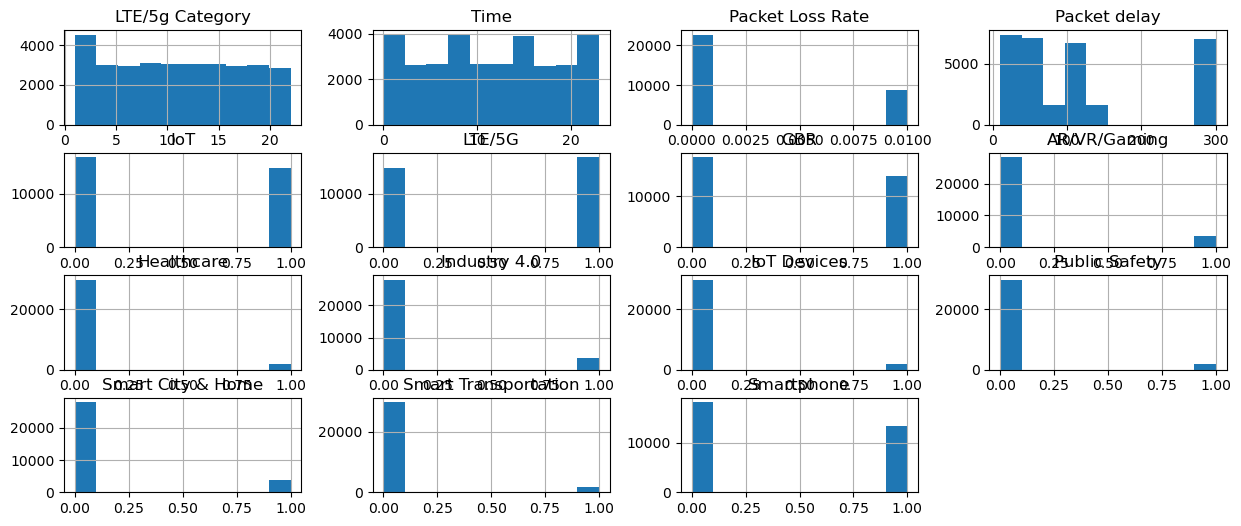

In [5]:
df.hist(figsize=(15, 6))

C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


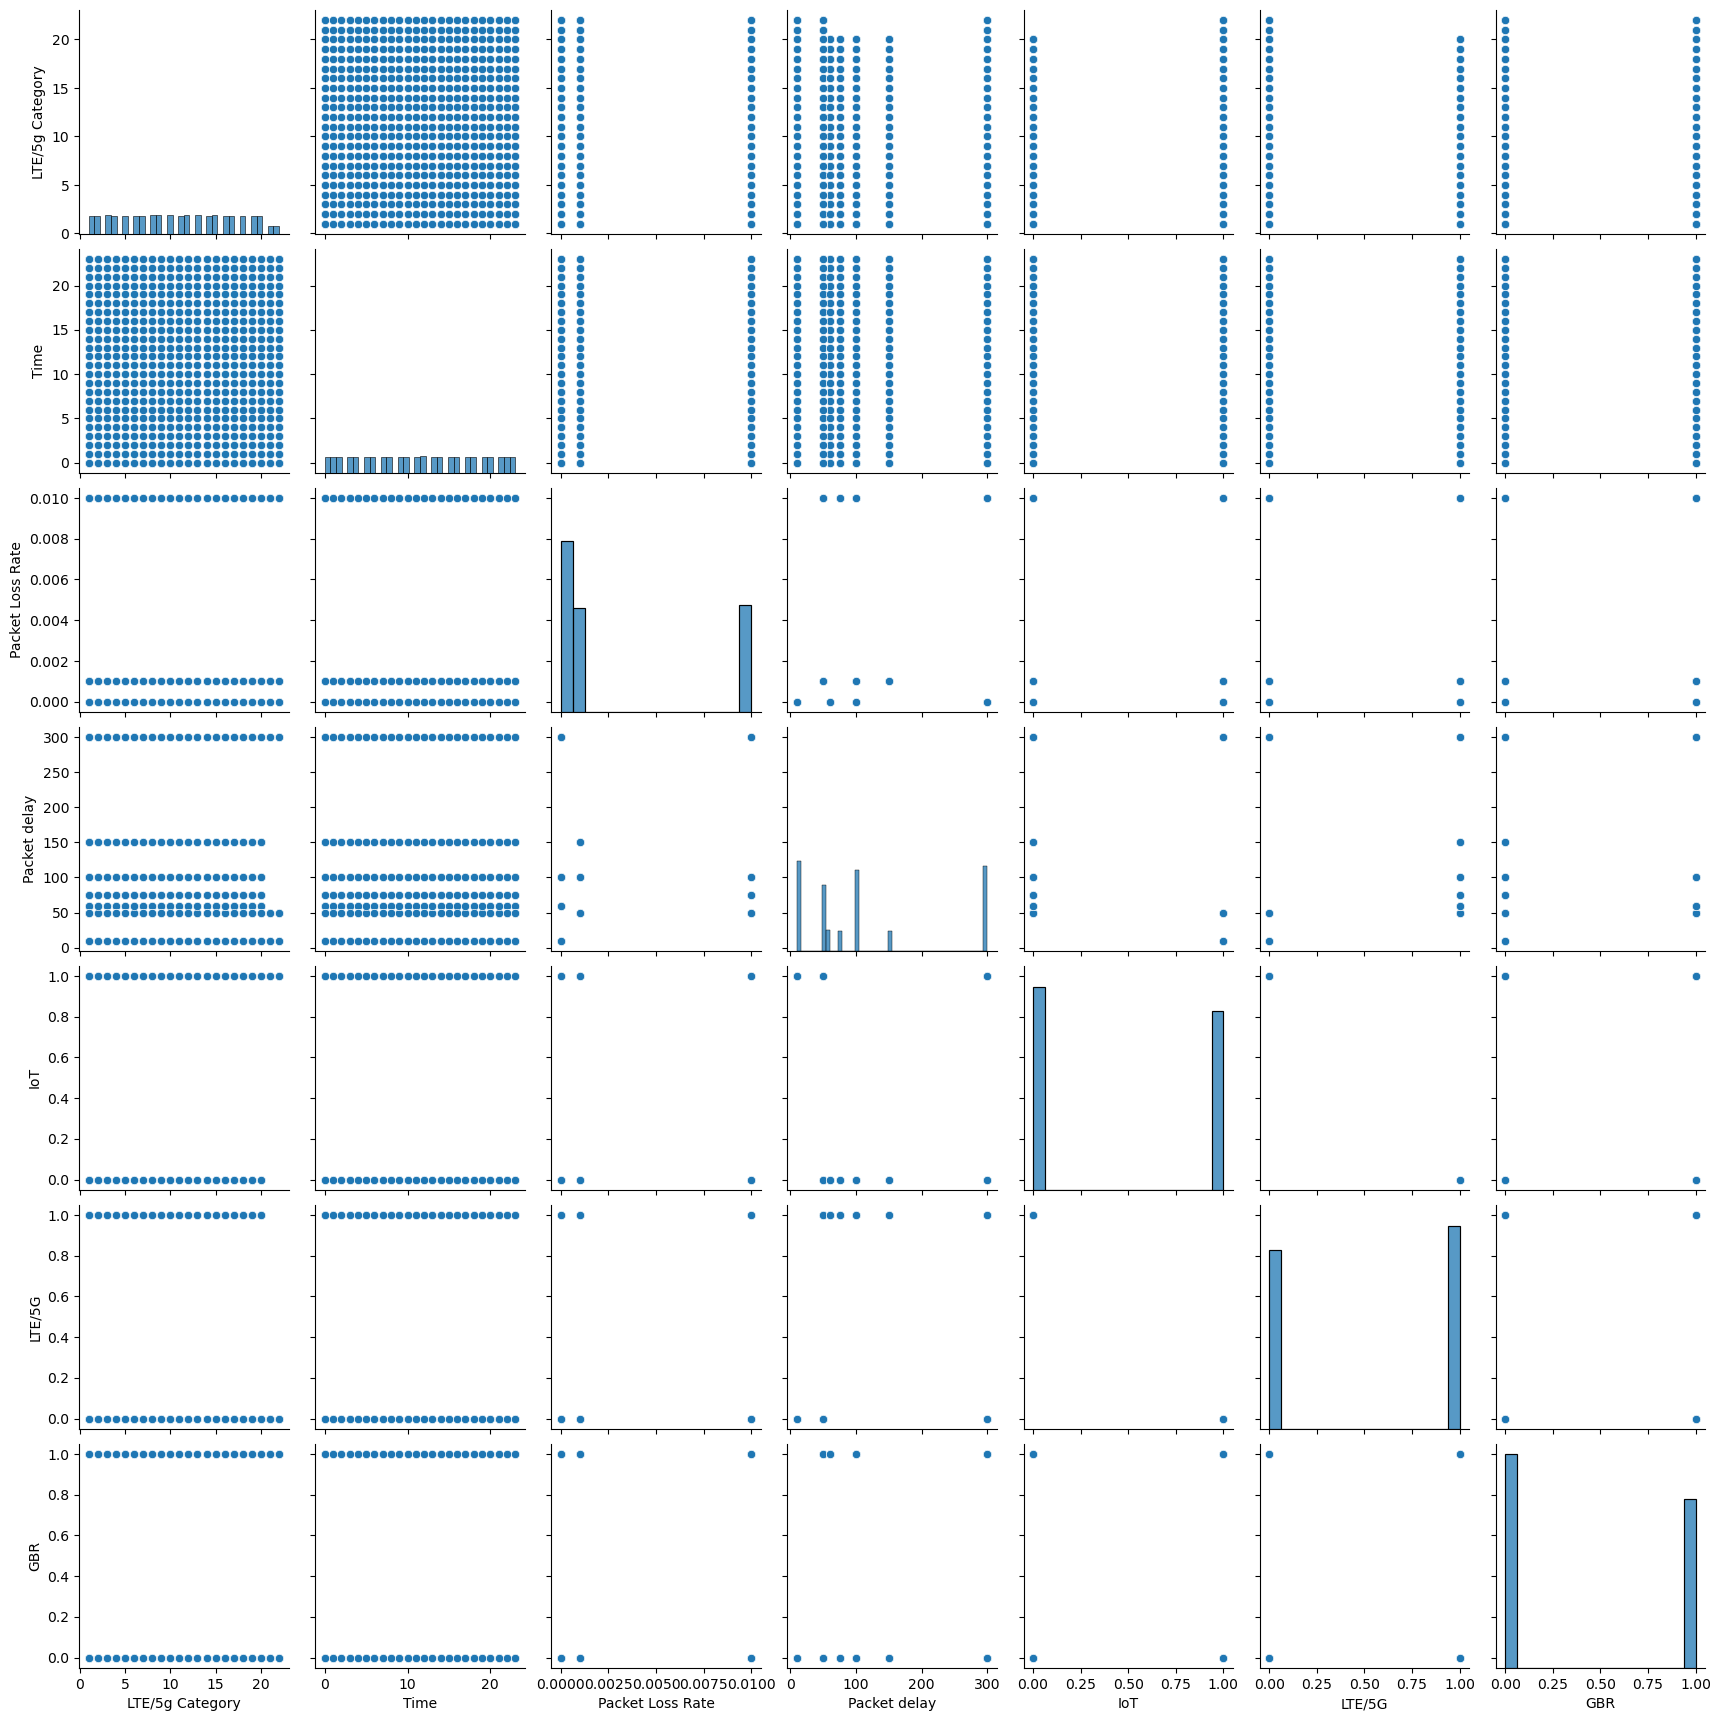

In [6]:
import seaborn as sns 

sns.pairplot(data=df[['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR']]);


In [7]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# Storing the fit object for later reference
scaler.fit(df)

X_train = scaler.transform(df)
y_train = pd.get_dummies(target_col)


Elapsed time to compute the importances: 0.006 seconds


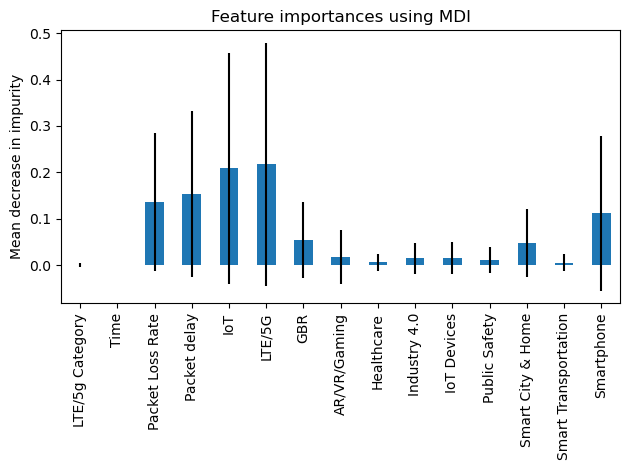

In [14]:
from sklearn.ensemble import RandomForestClassifier

feature_names = df.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

import time
import matplotlib.pyplot as plt

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [8]:
import tensorflow as tf
num_inputs = len(df.columns)
BATCH_SIZE = 32
EPOCHS = 10

classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(tf.keras.layers.Dense(units=10, input_dim=num_inputs, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(tf.keras.layers.Dense(units=num_classes, kernel_initializer='uniform', activation='softmax'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS, verbose=1)
 

Epoch 1/10
987/987 [==============================] - 4s 2ms/step - loss: 0.2077 - accuracy: 0.9409
Epoch 2/10
987/987 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 3/10
987/987 [==============================] - 2s 2ms/step - loss: 3.5080e-04 - accuracy: 1.0000
Epoch 4/10
987/987 [==============================] - 2s 2ms/step - loss: 1.3520e-04 - accuracy: 1.0000
Epoch 5/10
987/987 [==============================] - 2s 2ms/step - loss: 6.2167e-05 - accuracy: 1.0000
Epoch 6/10
987/987 [==============================] - 2s 2ms/step - loss: 3.1195e-05 - accuracy: 1.0000
Epoch 7/10
987/987 [==============================] - 2s 2ms/step - loss: 1.6424e-05 - accuracy: 1.0000
Epoch 8/10
987/987 [==============================] - 2s 2ms/step - loss: 8.9129e-06 - accuracy: 1.0000
Epoch 9/10
987/987 [==============================] - 2s 2ms/step - loss: 4.9345e-06 - accuracy: 1.0000
Epoch 10/10
987/987 [==============================] - 2s 2ms/step - los

In [48]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                170       
                                                                 
 dense_16 (Dense)            (None, 6)                 66        
                                                                 
 dense_17 (Dense)            (None, 3)                 21        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Predictions on testing data
df_test, target_col_test = preprocess("test.csv")

X_test = scaler.transform(df_test)

preds = classifier.predict(X_test)
preds.shape

987/987 [==============================] - 1s 938us/step


(31584, 3)

# Dataset 2

In [19]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "networkslicing"
project_name = settings["RUN"]["project_name"]


In [95]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=0)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    df["Use Case"]=df["Use Case"].astype('category').cat.codes
    df["Technology Supported"]=df["Technology Supported"].astype('category').cat.codes
    df["Day"]=df["Day"].astype('category').cat.codes
    df["GBR"]=df["GBR"].astype('category').cat.codes

    #df.drop(columns=["Use Case", "Day", "Time"], inplace=True)
    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()


Run project explor for data networkslicing
Num cols: 8. Num rows: 63167. Num classes: 3
Name cols: Index(['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time',
       'GBR', 'Packet Loss Rate', 'Packet delay'],
      dtype='object')
Target col: slice Type


,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay
1,7,1,1,3,1,1,0.01,100
2,7,1,1,3,2,1,0.01,100
3,7,1,1,3,3,1,0.01,100
4,7,1,1,3,4,1,0.01,100
5,7,1,1,3,5,1,0.01,100


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,63167.0,10.968243,6.064253,1.000000,6.000000,11.000,16.00,22.00
Technology Supported,63167.0,0.531907,0.498985,0.000000,0.000000,1.000,1.00,1.00
GBR,63167.0,0.558504,0.496569,0.000000,0.000000,1.000,1.00,1.00
Packet Loss Rate,63167.0,0.003091,0.004348,0.000001,0.000001,0.001,0.01,0.01
Packet delay,63167.0,114.308737,106.322142,10.000000,50.000000,75.000,150.00,300.00


array([[<Axes: title={'center': 'LTE/5g Category'}>,
        <Axes: title={'center': 'Technology Supported'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'GBR'}>,
        <Axes: title={'center': 'Packet Loss Rate'}>],
       [<Axes: title={'center': 'Packet delay'}>, <Axes: >, <Axes: >]],
      dtype=object)

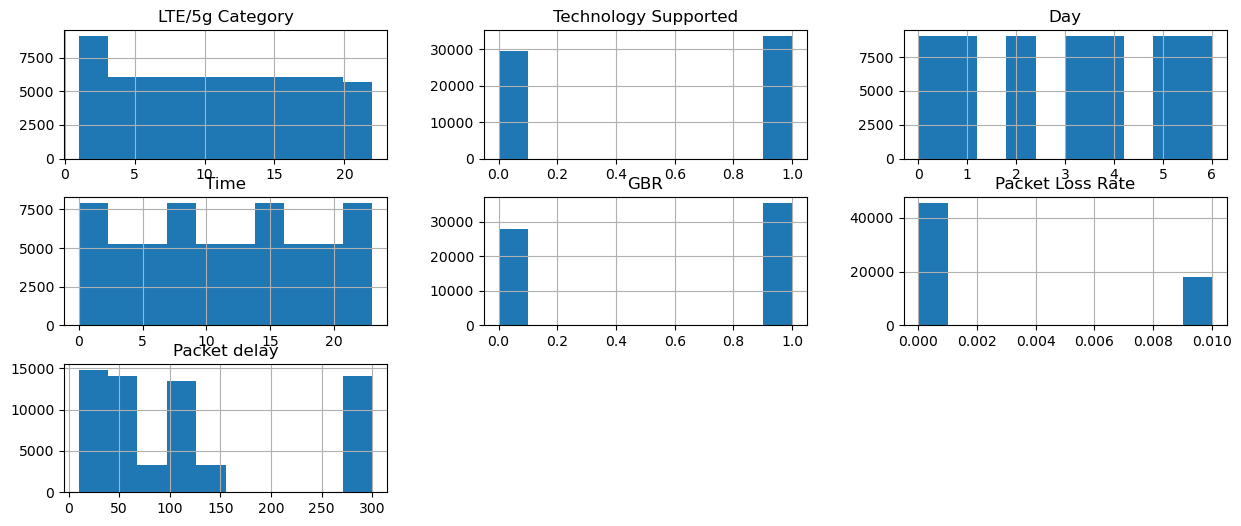

In [82]:
df.hist(figsize=(15, 6))

In [99]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

labels= pd.get_dummies(target_col)

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, stratify=labels)

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# Storing the fit object for later reference
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder

y_train_onehot = y_train.idxmax(axis=1)
le = LabelEncoder()
y_train_onehot = le.fit_transform(y_train_onehot)
y_test_onehot = y_test.idxmax(axis=1)
y_test_onehot = le.transform(y_test_onehot)

In [100]:
import seaborn as sns 

df_new = df.copy()
df_new['Label'] = le.transform(target_col)

df_new.corr()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,Label
Use Case,1.000000e+00,-3.365154e-02,4.092538e-01,7.907153e-15,2.447910e-05,-2.840951e-02,1.478670e-01,3.011191e-01,6.680423e-02
LTE/5g Category,-3.365154e-02,1.000000e+00,-8.225971e-02,-1.457921e-15,-4.323297e-05,1.035868e-02,1.396936e-02,-1.583651e-02,7.847951e-16
Technology Supported,4.092538e-01,-8.225971e-02,1.000000e+00,1.171573e-14,2.467278e-05,-1.256230e-01,-1.692933e-01,1.924235e-01,-4.439367e-15
Day,7.907153e-15,-1.457921e-15,1.171573e-14,1.000000e+00,7.011970e-18,-1.330768e-15,-5.822830e-16,3.357354e-15,9.615136e-16
Time,2.447910e-05,-4.323297e-05,2.467278e-05,7.011970e-18,1.000000e+00,2.338411e-05,4.178960e-05,-3.539577e-06,6.044244e-17
GBR,-2.840951e-02,1.035868e-02,-1.256230e-01,-1.330768e-15,2.338411e-05,1.000000e+00,1.355706e-02,-4.294413e-01,-5.166787e-01
Packet Loss Rate,1.478670e-01,1.396936e-02,-1.692933e-01,-5.822830e-16,4.178960e-05,1.355706e-02,1.000000e+00,3.122009e-01,6.096061e-01
Packet delay,3.011191e-01,-1.583651e-02,1.924235e-01,3.357354e-15,-3.539577e-06,-4.294413e-01,3.122009e-01,1.000000e+00,5.308839e-01
Label,6.680423e-02,7.847951e-16,-4.439367e-15,9.615136e-16,6.044244e-17,-5.166787e-01,6.096061e-01,5.308839e-01,1.000000e+00


C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


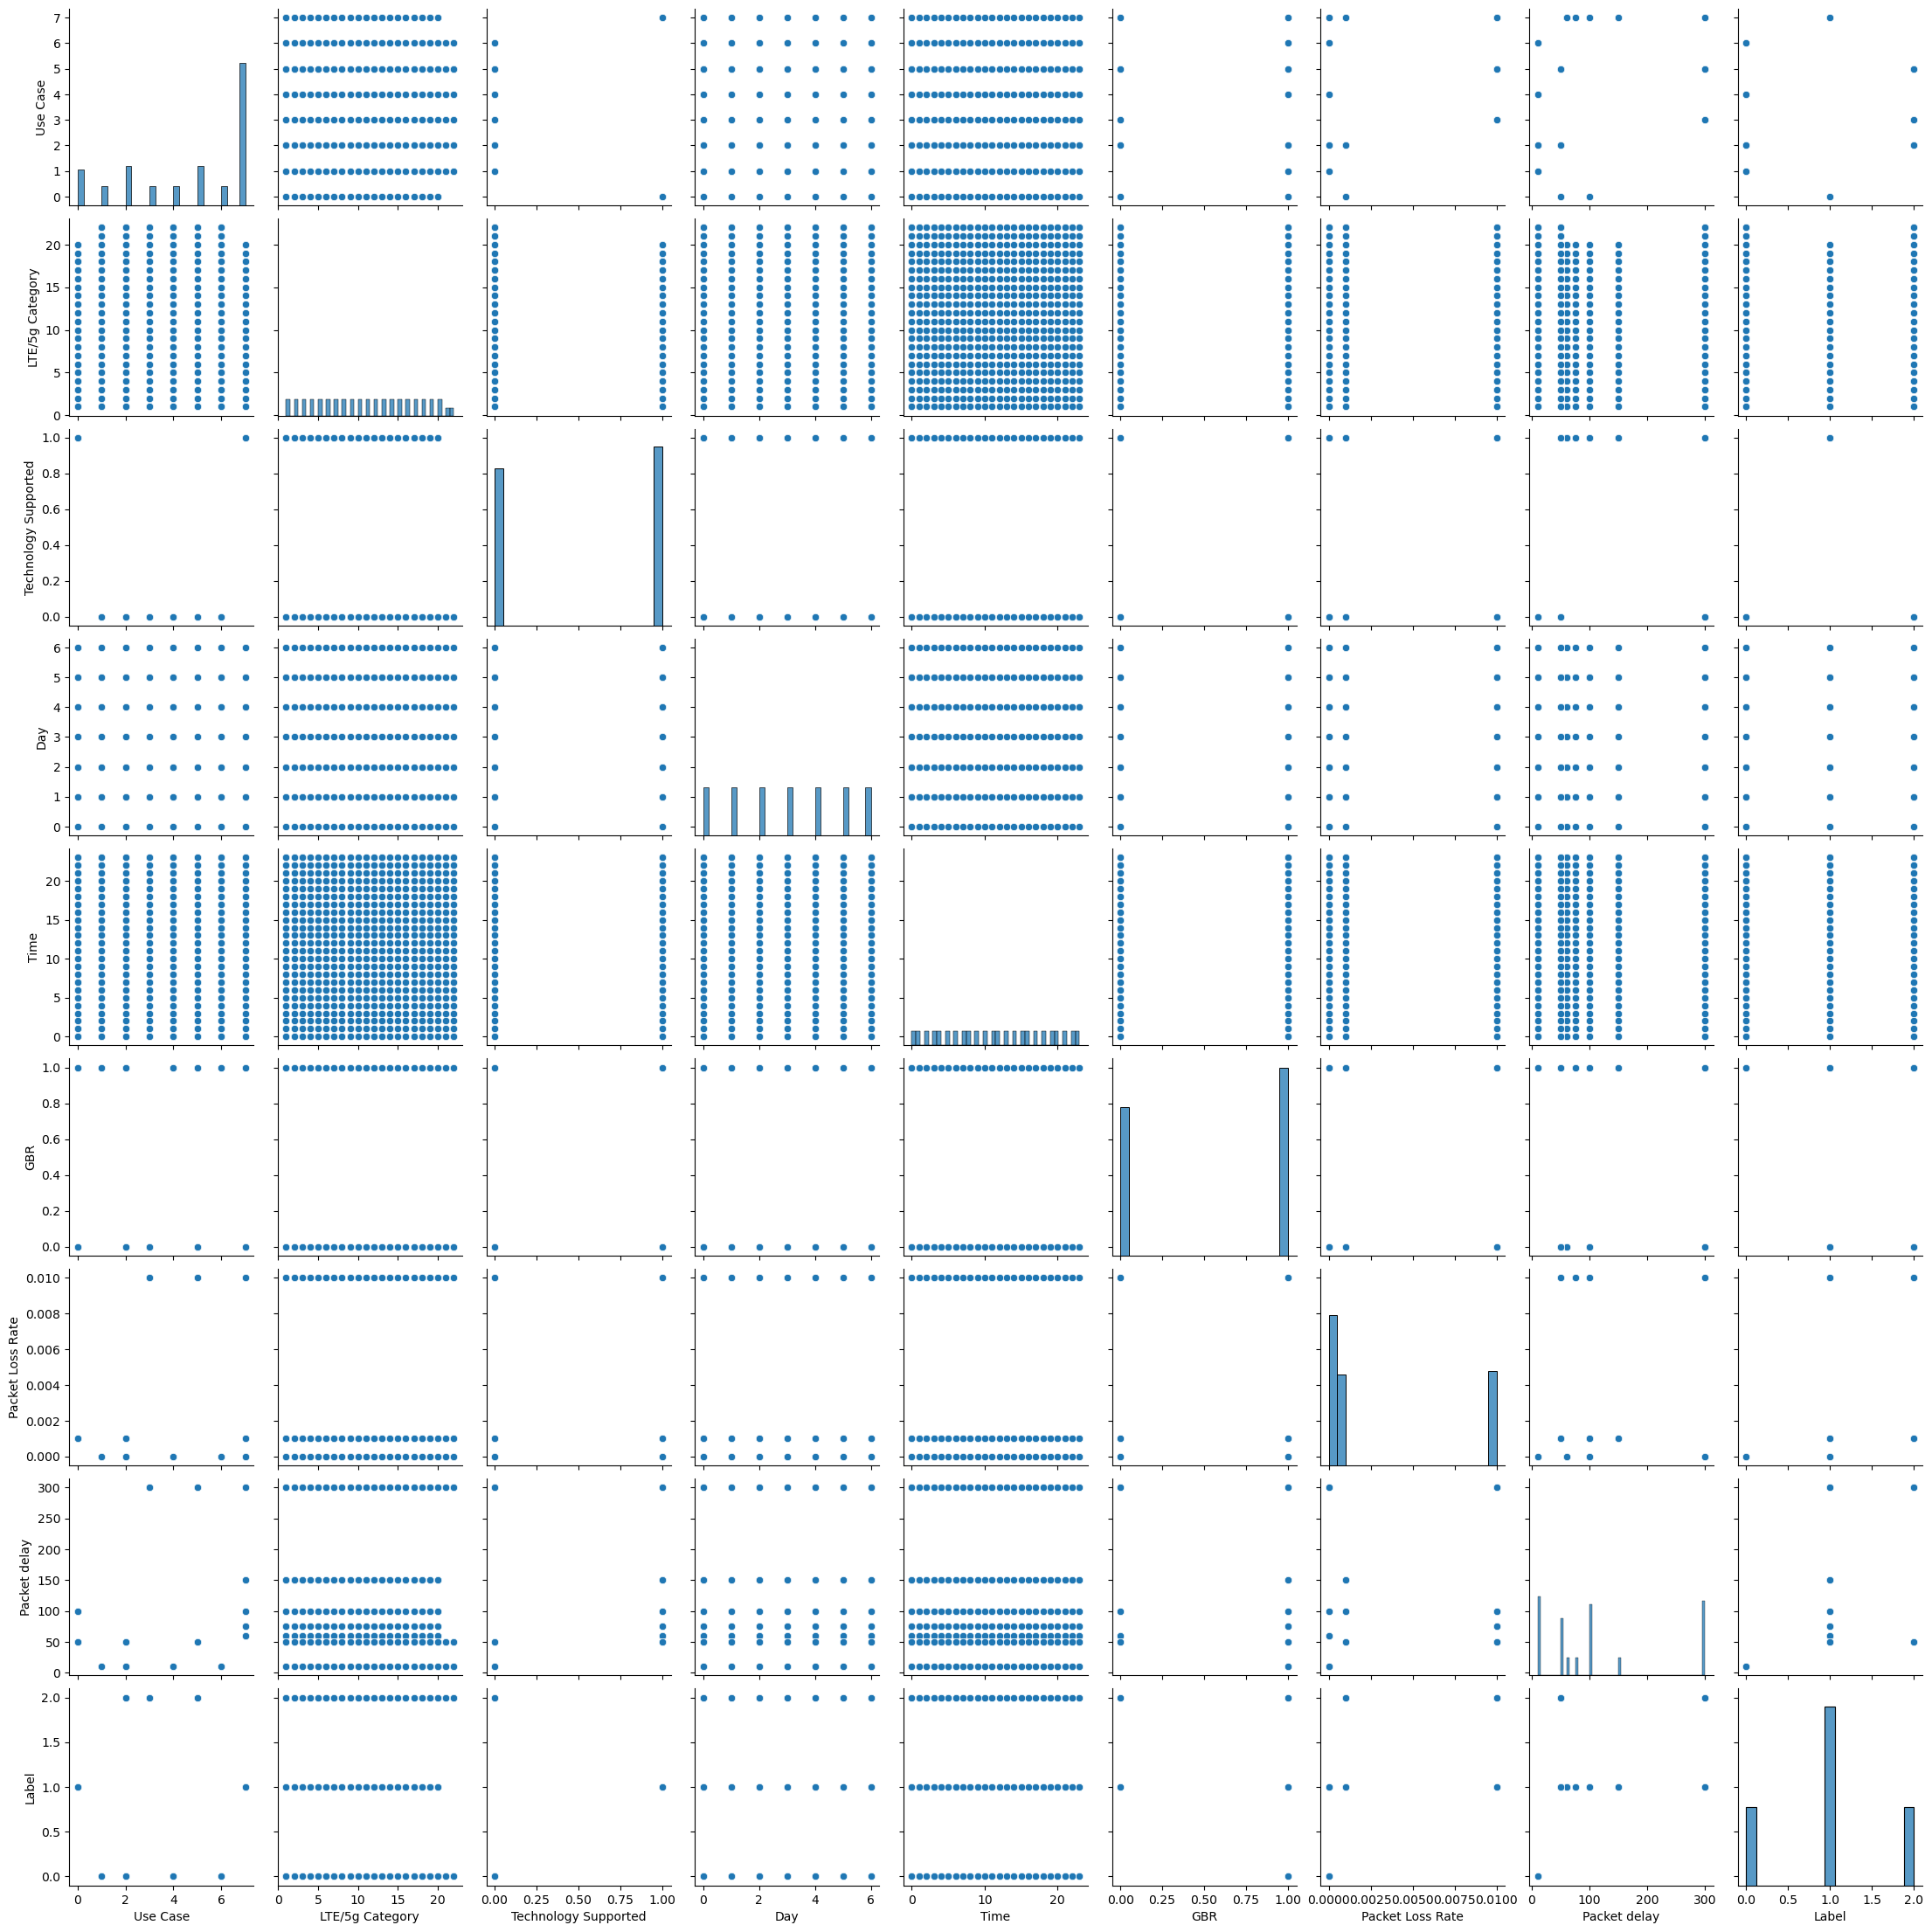

In [79]:

sns.pairplot(data=df_new);

Elapsed time to compute the importances: 0.007 seconds


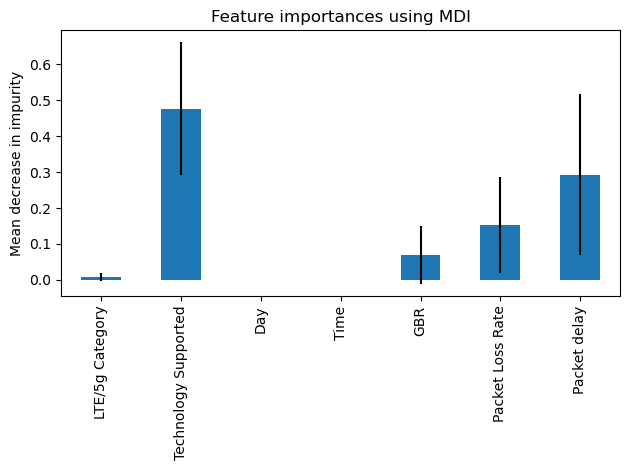

In [88]:
from sklearn.ensemble import RandomForestClassifier

feature_names = df.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

import time
import matplotlib.pyplot as plt

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train[0:300], y_train_onehot[0:300])

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [101]:
from sklearn.svm import SVC
clf.fit(X_train, y_train_onehot)

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [106]:
import tensorflow as tf
num_inputs = len(df.columns)
BATCH_SIZE = 32
EPOCHS = 10

classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(tf.keras.layers.Dense(units=10, input_dim=num_inputs, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(tf.keras.layers.Dense(units=num_classes, kernel_initializer='uniform', activation='softmax'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
history=classifier.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS, verbose=1)

Epoch 1/10
1580/1580 [==============================] - 22s 13ms/step - loss: 0.1690 - accuracy: 0.9311
Epoch 2/10
1580/1580 [==============================] - 17s 11ms/step - loss: 4.8128e-04 - accuracy: 1.0000
Epoch 3/10
1580/1580 [==============================] - 17s 11ms/step - loss: 9.7749e-05 - accuracy: 1.0000
Epoch 4/10
1580/1580 [==============================] - 17s 11ms/step - loss: 3.0635e-05 - accuracy: 1.0000
Epoch 5/10
1580/1580 [==============================] - 17s 11ms/step - loss: 1.1071e-05 - accuracy: 1.0000
Epoch 6/10
1580/1580 [==============================] - 17s 11ms/step - loss: 4.2628e-06 - accuracy: 1.0000
Epoch 7/10
1580/1580 [==============================] - 17s 11ms/step - loss: 1.6911e-06 - accuracy: 1.0000
Epoch 8/10
1580/1580 [==============================] - 18s 11ms/step - loss: 6.8475e-07 - accuracy: 1.0000
Epoch 9/10
1580/1580 [==============================] - 18s 11ms/step - loss: 2.7141e-07 - accuracy: 1.0000
Epoch 10/10
1580/1580 [=========

In [107]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


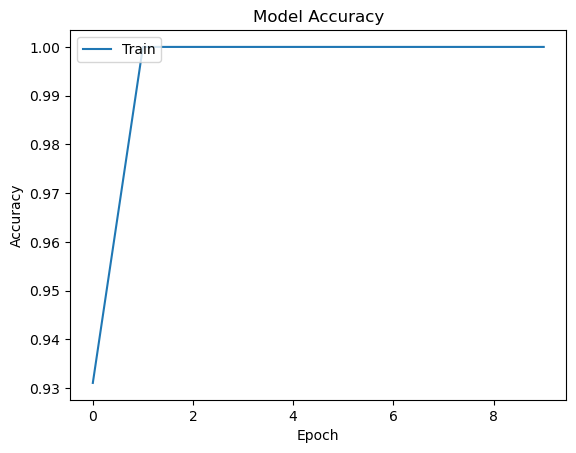

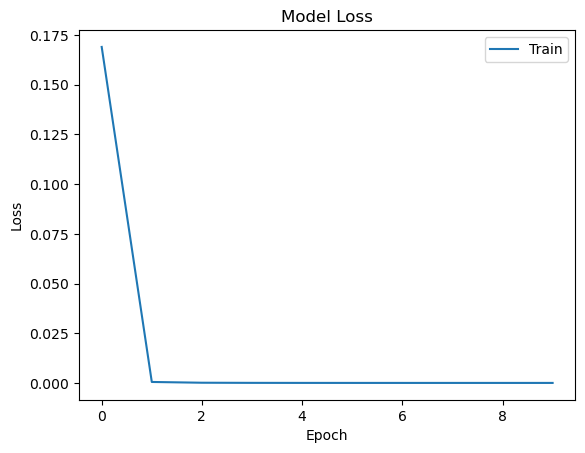

395/395 [==============================] - 5s 10ms/step - loss: 5.2084e-08 - accuracy: 1.0000

accuracy: 100.00%


In [112]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))


In [73]:
y_pred = classifier.predict(X_train).argmax(axis=1)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = classifier.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

1580/1580 [==============================] - 1s 875us/step
Train Accuracy: 1.0
395/395 [==============================] - 0s 953us/step
Test Accuracy: 1.0


# Dataset 3

In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "small_cell_nodes"
project_name = settings["RUN"]["project_name"]

In [14]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=None)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    #df["Use Case"]=df["Use Case"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data small_cell_nodes
Num cols: 22. Num rows: 2391. Num classes: 1
Name cols: Index(['OWNERNAME', 'APPLICANTCOMPANYNAME', 'PERMITMASTERNUMBER',
       'PERMITREFNUMBER', 'NODEGROUP', 'NODEID', 'NODEADDRESS', 'NODE_N',
       'NODE_E', 'NODETYPE', 'STATUS', 'POLEMATERIAL', 'POLEMANUFACTURER',
       'POLEMODEL', 'POLEHEIGHT_FT', 'POLECOLOR', 'RFEQUIPMENT', 'INTENDEDUSE',
       'ASSETOWNER', 'SITEID', 'FIXEDASSETID', 'COUNCIL_DISTRICT'],
      dtype='object')
Target col: slice Type


,OWNERNAME,APPLICANTCOMPANYNAME,PERMITMASTERNUMBER,PERMITREFNUMBER,NODEGROUP,NODEID,NODEADDRESS,NODE_N,NODE_E,NODETYPE,...,POLEMANUFACTURER,POLEMODEL,POLEHEIGHT_FT,POLECOLOR,RFEQUIPMENT,INTENDEDUSE,ASSETOWNER,SITEID,FIXEDASSETID,COUNCIL_DISTRICT
0,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A,DN90XS379E,1692 Glenarm PL,39.744554,-104.989407,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
1,Mobilitie,Mobilitie,NaN,NaN,2018 Group 3\r\n,DN90XS381B\r\n,1652 N. Lincoln St.\r\n,39.742565,-104.985513,"Type 1A, Utility Pole Mounted",...,Other,TBD by Xcel\r\n,34.0,,Alpha AW3477-S (Omni B41),Single Carrier,,NaN,NaN,10
2,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSG53C\r\n,1688 Welton St.\r\n,39.745220,-104.990277,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
3,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSH39C\r\n,1231 Glenarm PL.\r\n,39.740519,-104.994896,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
4,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1B\r\n,DN90XSH55D\r\n,1461 N. Delaware St.\r\n,39.739439,-104.993035,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,10


In [3]:
df = (
    df.loc[:,['OWNERNAME','NODE_N','NODE_E','APPLICANTCOMPANYNAME', 'STATUS']]
    .dropna()
)

df.head()

,OWNERNAME,NODE_N,NODE_E,APPLICANTCOMPANYNAME,STATUS
0,Mobilitie,39.744554,-104.989407,Mobilitie,Existing
1,Mobilitie,39.742565,-104.985513,Mobilitie,Existing
2,Mobilitie,39.745220,-104.990277,Mobilitie,Existing
3,Mobilitie,39.740519,-104.994896,Mobilitie,Existing
4,Mobilitie,39.739439,-104.993035,Mobilitie,Existing


In [4]:
np.unique(df['APPLICANTCOMPANYNAME'])

array(['BV', 'Crown Castle', 'Mobilitie', 'Smartlink', 'Verizon Wireless',
       'Zayo Group, LLC'], dtype=object)

In [5]:
np.unique(df['OWNERNAME'])

array(['ATT', 'Crown Castle', 'Mobilitie', 'VERIZON', 'Zayo Group, LLC'],
      dtype=object)

In [37]:
np.unique(df['NODETYPE'])

array(['Type 1A, Utility Pole Mounted',
       'Type 1B, Utility Pole Strand Mounted',
       'Type 2, Wood Street Light Mounted',
       'Type 3A, Combo Pole w/Cantenna',
       'Type 3B, Combo Pole w/External Shroud',
       'Type 3C, Combo Pole w/Cantenna, External Shroud',
       'Type 4, Single-Carrier Freestanding Pole',
       'Type 6A, Multi-Tenant Freestanding Pole A'], dtype=object)

In [6]:
np.unique(df['STATUS'])

array(['Existing', 'Future Planned 1-2 Year', 'Future Planned 1-2 year',
       'Installed', 'Proposed'], dtype=object)

In [15]:
ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y != "Proposed")]
df_existing = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_existing.columns)
num_rows = len(df_existing)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")


Num cols: 22. Num rows: 909.


In [16]:
import folium as fl

m = fl.Map(location=[39.742793, -105.0109598],zoom_start=11)

for lat,long,owner in zip(df_existing.NODE_N,df_existing.NODE_E,df.OWNERNAME):
    fl.Marker([lat,long],popup=owner).add_to(m)

m

In [17]:

from folium.plugins import HeatMap

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_existing.NODE_N,df_existing.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

In [18]:
# Proposed 

ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y == "Proposed")]
df_proposed = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_proposed.columns)
num_rows = len(df_proposed)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_proposed.NODE_N,df_proposed.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

Num cols: 22. Num rows: 1482.


In [78]:
NEAREST = 5 

import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

import numba as nb

def calculate_distances(nodes_n, nodes_e):
    dim = len(nodes_n)
    assert dim > 0
    dist = np.zeros((dim,dim))

    for i in range(dim):
        for j in range(i+1):
            dist[i][j] = euclidean_distance([nodes_n[i], nodes_e[i]], [nodes_n[j], nodes_e[j]]) 
            dist[j][i] = euclidean_distance([nodes_n[i], nodes_e[i]], [nodes_n[j], nodes_e[j]]) 

    return dist

def find_nearest(index, dist_, df_):
    distances = dist[index][:]
    sort_index = np.argsort(distances)[1:NEAREST+1] #ignore itself
    nearest = df.iloc[sort_index]
    vals = [[x,y] for (x,y) in zip(nearest["NODE_N"], nearest["NODE_E"])]
    vals = [item for row in vals for item in row]
    ids = list(nearest.index.values)
    return (vals, ids)

datafile = pathjoin(datasets_dir, project_name, dataset_name, 'distances.npy')
#dist = calculate_distances(df["NODE_N"].values, df["NODE_E"].values)
#np.save(datafile, dist) # save

dist = np.load(datafile) # load

nearest_pairs = [find_nearest(x,dist,df) for x in range(len(df))]
connections  = [ {"target": y[1][i], "source":x} for (x,y)  in zip(range(len(df)), nearest_pairs) for i in range(NEAREST)]
connections = pd.DataFrame(connections)
connections.head()

,target,source
0,2299,0
1,330,0
2,2,0
3,370,0
4,1189,0


In [96]:
features = pd.DataFrame([{'feat_'+str(i): y[0][i] for i in range(NEAREST*2)} for (x,y)  in zip(range(len(df)), nearest_pairs) ])
features["node_n"] = df["NODE_N"]
features["node_e"] = df["NODE_E"]
features["name"] = df.index
features["proposed"] = [ 1 if x == "Proposed" else 0 for x in df["STATUS"]]
features.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,node_n,node_e,name,proposed
0,39.744611,-104.989294,39.743861,-104.988855,39.745220,-104.990277,39.745933,-104.989345,39.743673,-104.990533,39.744554,-104.989407,0,0
1,39.743362,-104.985824,39.741372,-104.986025,39.742844,-104.983708,39.740989,-104.987308,39.741742,-104.983057,39.742565,-104.985513,1,0
2,39.744554,-104.989407,39.744611,-104.989294,39.745933,-104.989345,39.743673,-104.990533,39.743861,-104.988855,39.745220,-104.990277,2,0
3,39.739439,-104.993035,39.742589,-104.993972,39.739961,-104.997476,39.739560,-104.997840,39.743758,-104.993932,39.740519,-104.994896,3,0
4,39.740519,-104.994896,39.736805,-104.993929,39.737050,-104.991570,39.737658,-104.990353,39.742589,-104.993972,39.739439,-104.993035,4,0


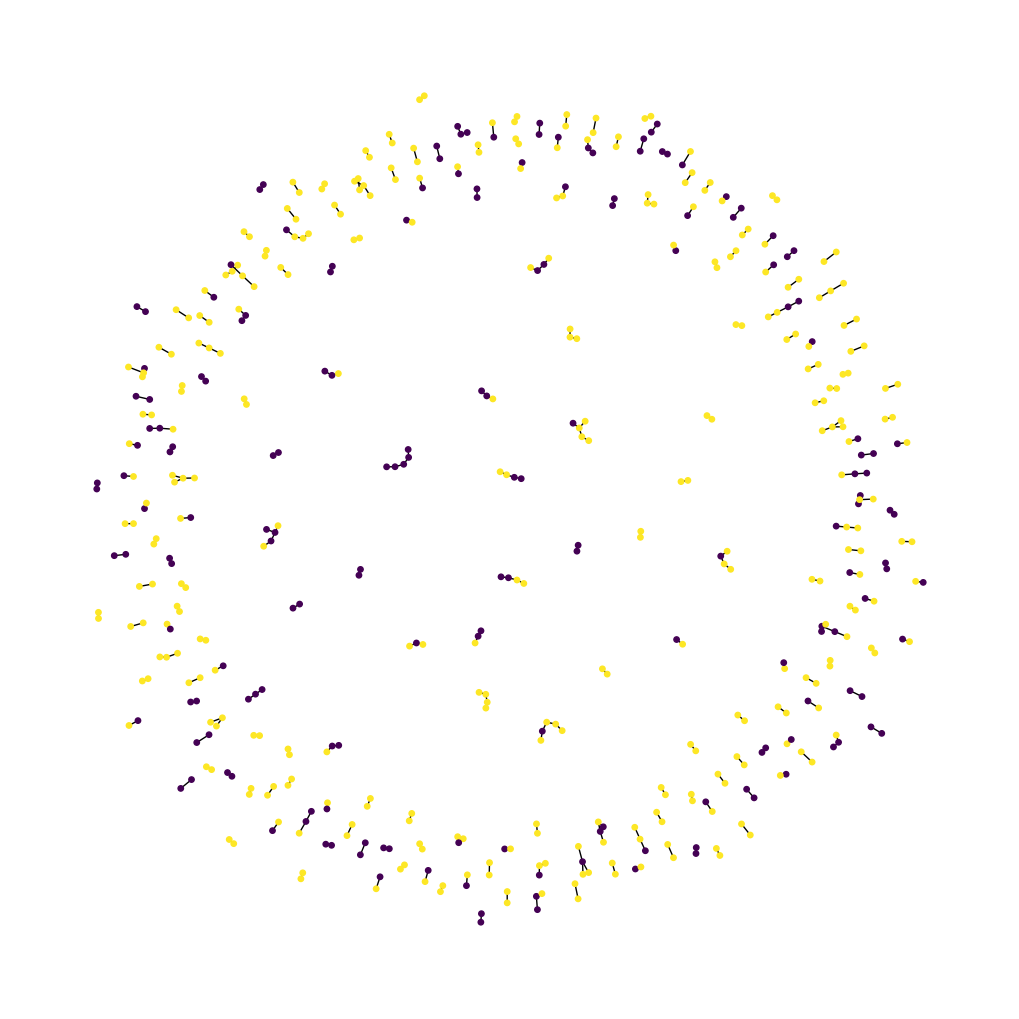

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
colors = features["proposed"].tolist()
cora_graph = nx.from_pandas_edgelist(connections.sample(n=290))
labels = list(features[features["name"].isin(list(cora_graph.nodes))]["proposed"])
nx.draw_spring(cora_graph, node_size=15, node_color=labels)

In [128]:
train_data, test_data = [], []

for _, group_data in features.groupby("proposed"):
    # Select around 80% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1902, 14)
Test data shape: (489, 14)


In [179]:
hidden_units = [16, 16]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 100
batch_size = 256

def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=10, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
    

In [144]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [145]:
feature_names = set(features.columns) - {"name", "proposed"}
num_features = len(feature_names)
num_classes = 2

# Create train and test features as a numpy array.
x_train = train_data[list(feature_names)].to_numpy()
x_test = test_data[list(feature_names)].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["proposed"]
y_test = test_data["proposed"]

In [146]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 12)]         0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           1648        ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [147]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/30
7/7 [==============================] - 3s 68ms/step - loss: 1.2905 - acc: 0.5260 - val_loss: 0.6724 - val_acc: 0.6224
Epoch 2/30
7/7 [==============================] - 0s 26ms/step - loss: 1.0036 - acc: 0.5297 - val_loss: 0.9914 - val_acc: 0.6224
Epoch 3/30
7/7 [==============================] - 0s 20ms/step - loss: 0.8875 - acc: 0.5446 - val_loss: 0.6995 - val_acc: 0.6224
Epoch 4/30
7/7 [==============================] - 0s 18ms/step - loss: 0.8295 - acc: 0.5675 - val_loss: 0.7550 - val_acc: 0.6224
Epoch 5/30
7/7 [==============================] - 0s 21ms/step - loss: 0.7942 - acc: 0.5452 - val_loss: 0.6845 - val_acc: 0.6224
Epoch 6/30
7/7 [==============================] - 0s 17ms/step - loss: 0.7673 - acc: 0.5495 - val_loss: 0.6719 - val_acc: 0.6224
Epoch 7/30
7/7 [==============================] - 0s 25ms/step - loss: 0.7455 - acc: 0.5693 - val_loss: 0.6680 - val_acc: 0.6224
Epoch 8/30
7/7 [==============================] - 0s 17ms/step - loss: 0.7307 - acc: 0.5990 - val

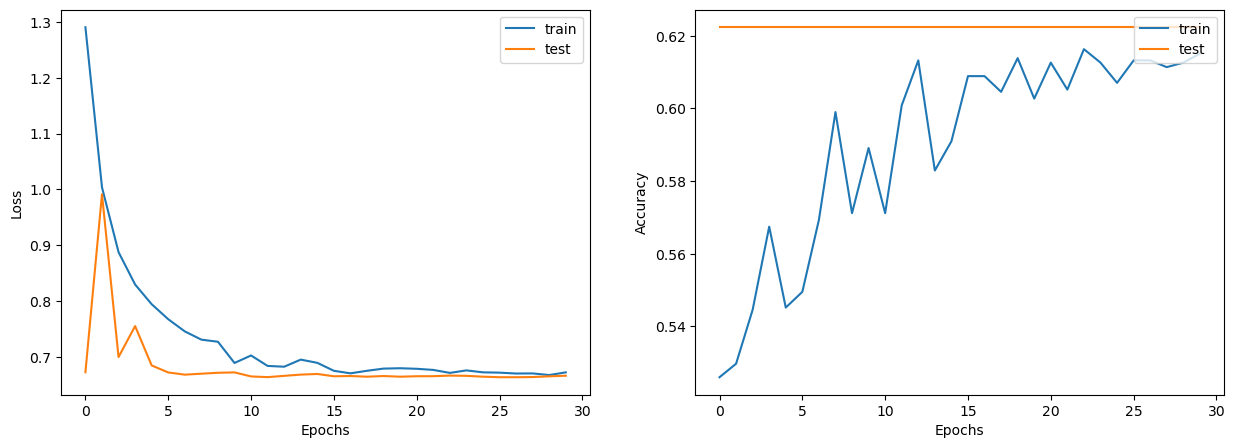

Test accuracy: 63.39%


In [148]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [153]:
class_idx = [0, 1]
class_values = ['existing', 'proposed']

def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")

In [154]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 0s 21ms/step
Instance 1:
- existing: 42.21%
- proposed: 57.79%
Instance 2:
- existing: 42.21%
- proposed: 57.79%


In [155]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = connections[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    features.sort_values("name")[list(feature_names)].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 11955)
Nodes shape: (2391, 12)


In [156]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [157]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [158]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[4.895792  8.241153 ]
 [4.903587  8.243154 ]
 [4.9032807 8.242388 ]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (2391, 32)                1648      
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (2391, 32)                2368      
                                                                 
 logits (Dense)              multiple                  66   

In [180]:
x_train = train_data.name.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/100
7/7 [==============================] - 3s 119ms/step - loss: 1.4415 - acc: 0.6132 - val_loss: 1.2043 - val_acc: 0.6224
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 1.5199 - acc: 0.6151 - val_loss: 1.1582 - val_acc: 0.6224
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 1.2458 - acc: 0.6126 - val_loss: 1.1137 - val_acc: 0.6224
Epoch 4/100
7/7 [==============================] - 0s 21ms/step - loss: 1.1388 - acc: 0.6151 - val_loss: 1.0708 - val_acc: 0.6224
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 1.1430 - acc: 0.6145 - val_loss: 1.0291 - val_acc: 0.6224
Epoch 6/100
7/7 [==============================] - 0s 25ms/step - loss: 1.0990 - acc: 0.6145 - val_loss: 0.9889 - val_acc: 0.6224
Epoch 7/100
7/7 [==============================] - 0s 23ms/step - loss: 1.1837 - acc: 0.6157 - val_loss: 0.9511 - val_acc: 0.6224
Epoch 8/100
7/7 [==============================] - 0s 23ms/step - loss: 1.0580 - acc: 0.6

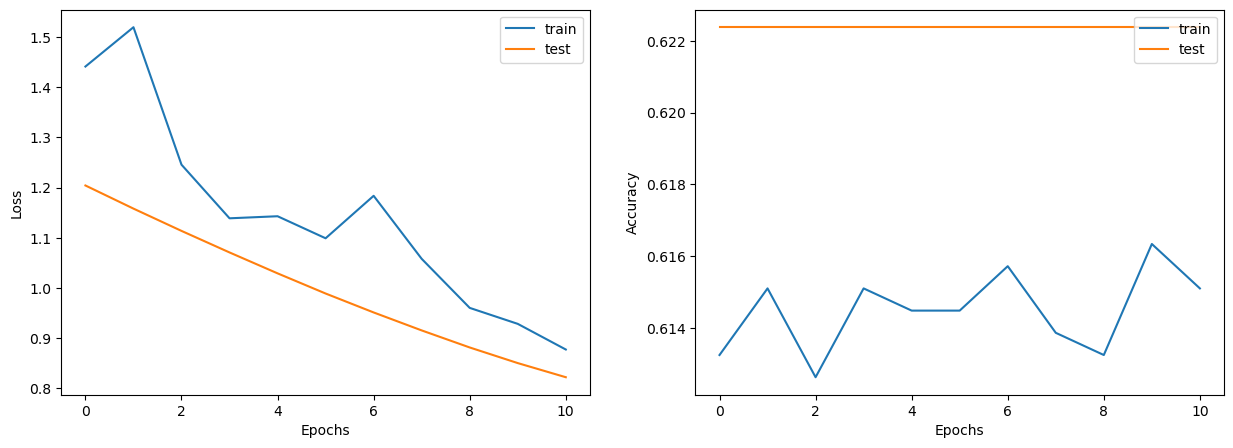

Test accuracy: 63.39%


In [181]:
display_learning_curves(history)
x_test = test_data.name.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [164]:
# First we add the N new_instances as nodes to the graph
# by appending the new_instance to node_features.
num_nodes = node_features.shape[0]
new_node_features = np.concatenate([node_features, new_instances])
# Second we add the M edges (citations) from each new node to a set
# of existing nodes in a particular subject
new_node_indices = [i + num_nodes for i in range(num_classes)]
new_citations = []
for subject_idx, group in features.groupby("proposed"):
    subject_papers = list(group.name)
    # Select random x papers specific subject.
    selected_paper_indices1 = np.random.choice(subject_papers, 5)
    # Select random y papers from any subject (where y < x).
    selected_paper_indices2 = np.random.choice(list(features.name), 2)
    # Merge the selected paper indices.
    selected_paper_indices = np.concatenate(
        [selected_paper_indices1, selected_paper_indices2], axis=0
    )
    # Create edges between a citing paper idx and the selected cited papers.
    citing_paper_indx = new_node_indices[subject_idx]
    for cited_paper_idx in selected_paper_indices:
        new_citations.append([citing_paper_indx, cited_paper_idx])

new_citations = np.array(new_citations).T
new_edges = np.concatenate([edges, new_citations], axis=1)


print("Original node_features shape:", gnn_model.node_features.shape)
print("Original edges shape:", gnn_model.edges.shape)
gnn_model.node_features = new_node_features
gnn_model.edges = new_edges
gnn_model.edge_weights = tf.ones(shape=new_edges.shape[1])
print("New node_features shape:", gnn_model.node_features.shape)
print("New edges shape:", gnn_model.edges.shape)

logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Original node_features shape: (2391, 12)
Original edges shape: (2, 11955)
New node_features shape: (2393, 12)
New edges shape: (2, 11969)
1/1 [==============================] - 1s 503ms/step
Instance 1:
- existing: 39.14%
- proposed: 60.86%
Instance 2:
- existing: 39.14%
- proposed: 60.86%


# Extras

In [111]:
# Obtain random indices
random_indices = np.random.permutation(range(features.shape[0]))

# 50/50 split
train_data = features.iloc[random_indices[: 4* len(random_indices) // 5]]
test_data = features.iloc[random_indices[4*len(random_indices) // 5 :]]
print(train_data.shape)
print(test_data.shape)

(1912, 14)
(479, 14)


In [112]:
import tensorflow as tf 

# Obtain paper indices which will be used to gather node states
# from the graph later on when training the model
train_indices = train_data["name"].to_numpy()
test_indices = test_data["name"].to_numpy()

# Obtain ground truth labels corresponding to each paper_id
train_labels = train_data["proposed"].to_numpy()
test_labels = test_data["proposed"].to_numpy()

# Define graph, namely an edge tensor and a node feature tensor
edges = tf.convert_to_tensor(connections[["target", "source"]])
node_states = tf.convert_to_tensor(features.sort_values("name").iloc[:, 0:-2])

# Print shapes of the graph
print("Edges shape:\t\t", edges.shape)
print("Node features shape:", node_states.shape)

Edges shape:		 (11955, 2)
Node features shape: (2391, 12)


In [113]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import initializers

class GraphAttention(layers.Layer):
    def __init__(
        self,
        units,
        kernel_initializer= initializers.glorot_uniform(seed=0),#"glorot_uniform",
        kernel_regularizer=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.units = units
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)

    def build(self, input_shape):

        self.kernel = self.add_weight(
            shape=(input_shape[0][-1], self.units),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel",
        )
        self.kernel_attention = self.add_weight(
            shape=(self.units * 2, 1),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel_attention",
        )
        self.built = True

    def call(self, inputs):
        node_states, edges = inputs

        # Linearly transform node states
        node_states_transformed = tf.matmul(node_states, self.kernel)

        # (1) Compute pair-wise attention scores
        node_states_expanded = tf.gather(node_states_transformed, edges)
        node_states_expanded = tf.reshape(
            node_states_expanded, (tf.shape(edges)[0], -1)
        )
        attention_scores = tf.nn.leaky_relu(
            tf.matmul(node_states_expanded, self.kernel_attention)
        )
        attention_scores = tf.squeeze(attention_scores, -1)

        # (2) Normalize attention scores
        attention_scores = tf.math.exp(tf.clip_by_value(attention_scores, -2, 2))
        attention_scores_sum = tf.math.unsorted_segment_sum(
            data=attention_scores,
            segment_ids=edges[:, 0],
            num_segments=tf.reduce_max(edges[:, 0]) + 1,
        )
        attention_scores_sum = tf.repeat(
            attention_scores_sum, tf.math.bincount(tf.cast(edges[:, 0], "int32"))
        )
        attention_scores_norm = attention_scores / attention_scores_sum

        # (3) Gather node states of neighbors, apply attention scores and aggregate
        node_states_neighbors = tf.gather(node_states_transformed, edges[:, 1])
        out = tf.math.unsorted_segment_sum(
            data=node_states_neighbors * attention_scores_norm[:, tf.newaxis],
            segment_ids=edges[:, 0],
            num_segments=tf.shape(node_states)[0],
        )
        return out


class MultiHeadGraphAttention(layers.Layer):
    def __init__(self, units, num_heads=8, merge_type="concat", **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]

    def call(self, inputs):
        atom_features, pair_indices = inputs

        # Obtain outputs from each attention head
        outputs = [
            attention_layer([atom_features, pair_indices])
            for attention_layer in self.attention_layers
        ]
        # Concatenate or average the node states from each head
        if self.merge_type == "concat":
            outputs = tf.concat(outputs, axis=-1)
        else:
            outputs = tf.reduce_mean(tf.stack(outputs, axis=-1), axis=-1)
        # Activate and return node states
        return tf.nn.relu(outputs)

In [114]:
class GraphAttentionNetwork(keras.Model):
    def __init__(
        self,
        node_states,
        edges,
        hidden_units,
        num_heads,
        num_layers,
        output_dim,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.node_states = node_states
        self.edges = edges
        self.preprocess = layers.Dense(hidden_units * num_heads, activation="relu")
        self.attention_layers = [
            MultiHeadGraphAttention(hidden_units, num_heads) for _ in range(num_layers)
        ]
        self.output_layer = layers.Dense(output_dim)

    def call(self, inputs):
        node_states, edges = inputs
        x = self.preprocess(node_states)
        for attention_layer in self.attention_layers:
            x = attention_layer([x, edges]) + x
        outputs = self.output_layer(x)
        return outputs

    def train_step(self, data):
        indices, labels = data

        with tf.GradientTape() as tape:
            # Forward pass
            outputs = self([self.node_states, self.edges])
            # Compute loss
            loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, data):
        indices = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute probabilities
        return tf.nn.softmax(tf.gather(outputs, indices))

    def test_step(self, data):
        indices, labels = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute loss
        loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

In [118]:
# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 8
NUM_LAYERS = 3
OUTPUT_DIM = 2 # len(class_values)

NUM_EPOCHS = 10
BATCH_SIZE = 256
VALIDATION_SPLIT = 0.1
LEARNING_RATE = 3e-0
MOMENTUM = 0.9

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(LEARNING_RATE, momentum=MOMENTUM)
accuracy_fn = keras.metrics.SparseCategoricalAccuracy(name="acc")
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=1e-5, patience=5, restore_best_weights=True
)

# Build model
gat_model = GraphAttentionNetwork(
    node_states, edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM
)

# Compile model
gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

gat_model.fit(
    x=train_indices,
    y=train_labels,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    verbose=2,
)

_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)

print("—" * 38 + f"\nTest Accuracy {test_accuracy*100:.1f}%")

Epoch 1/10
7/7 - 12s - loss: nan - acc: 0.3866 - val_loss: nan - val_acc: 0.4062 - 12s/epoch - 2s/step
Epoch 2/10
7/7 - 0s - loss: nan - acc: 0.3791 - val_loss: nan - val_acc: 0.4062 - 428ms/epoch - 61ms/step
Epoch 3/10
7/7 - 0s - loss: nan - acc: 0.3791 - val_loss: nan - val_acc: 0.4062 - 351ms/epoch - 50ms/step
Epoch 4/10
7/7 - 0s - loss: nan - acc: 0.3791 - val_loss: nan - val_acc: 0.4062 - 325ms/epoch - 46ms/step
Epoch 5/10
7/7 - 0s - loss: nan - acc: 0.3791 - val_loss: nan - val_acc: 0.4062 - 325ms/epoch - 46ms/step
Epoch 6/10
7/7 - 0s - loss: nan - acc: 0.3791 - val_loss: nan - val_acc: 0.4062 - 370ms/epoch - 53ms/step
——————————————————————————————————————
Test Accuracy 37.4%


# Dataset 4

In [9]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "deep-slice"
project_name = settings["RUN"]["project_name"]

In [10]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "Slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_excel(datafile, sheet_name='Model_Inputs_Outputs', index_col=None)
    df.rename(columns={x: x.split(" (")[0] for x in df.columns}, inplace=True)

    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
        
    df.drop(columns=["Unnamed: 0"], inplace=True)
    df["Use CaseType"]=df["Use CaseType"].astype('category').cat.codes
    df["Packet Delay Budget"]=df["Packet Delay Budget"].astype('category').cat.codes
    df["Technology Supported"]=df["Technology Supported"].astype('category').cat.codes
    df["LTE/5G UE Category"]=df["LTE/5G UE Category"].astype('category').cat.codes
    df["Day"]=df["Day"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("5G_Dataset_Network_Slicing_CRAWDAD_Shared.xlsx")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data deep-slice
Num cols: 8. Num rows: 466739. Num classes: 3
Name cols: Index(['Use CaseType', 'LTE/5G UE Category', 'Technology Supported', 'Day',
       'Time', 'QCI', 'Packet Loss Rate', 'Packet Delay Budget'],
      dtype='object')
Target col: Slice Type


,Use CaseType,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
0,7,1,1,1,1,1,0.01,2
1,7,1,1,1,1,2,0.01,2
2,7,1,1,1,1,3,0.01,2
3,7,1,1,1,1,4,0.01,2
4,7,1,1,1,1,65,0.01,2


In [11]:
df.head()

,Use CaseType,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
0,7,1,1,1,1,1,0.01,2
1,7,1,1,1,1,2,0.01,2
2,7,1,1,1,1,3,0.01,2
3,7,1,1,1,1,4,0.01,2
4,7,1,1,1,1,65,0.01,2


In [12]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'D:\\git\\github\\ic\\EXPLOR_network_slicing\\utils\\__init__.py'>



Describing pandas dataframe
                         count       mean        std       min       25%  \
Use CaseType          373391.0   3.358603   2.479774  0.000000  1.000000   
LTE/5G UE Category    373391.0  10.546363   5.862535  0.000000  5.000000   
Technology Supported  373391.0   0.358828   0.479657  0.000000  0.000000   
Day                   373391.0   3.001722   1.999014  0.000000  1.000000   
Time                  373391.0  12.006237   6.639469  1.000000  6.000000   
QCI                   373391.0  24.229226  28.952207  1.000000  4.000000   
Packet Loss Rate      373391.0   0.003987   0.004642  0.000001  0.000001   
Packet Delay Budget   373391.0   0.908763   0.893674  0.000000  0.000000   

                         50%    75%    max  
Use CaseType           3.000   6.00   7.00  
LTE/5G UE Category    11.000  16.00  22.00  
Technology Supported   0.000   1.00   1.00  
Day                    3.000   5.00   6.00  
Time                  12.000  18.00  23.00  
QCI            

C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Prepare random forest importance
Elapsed time to compute the importances: 0.012 seconds


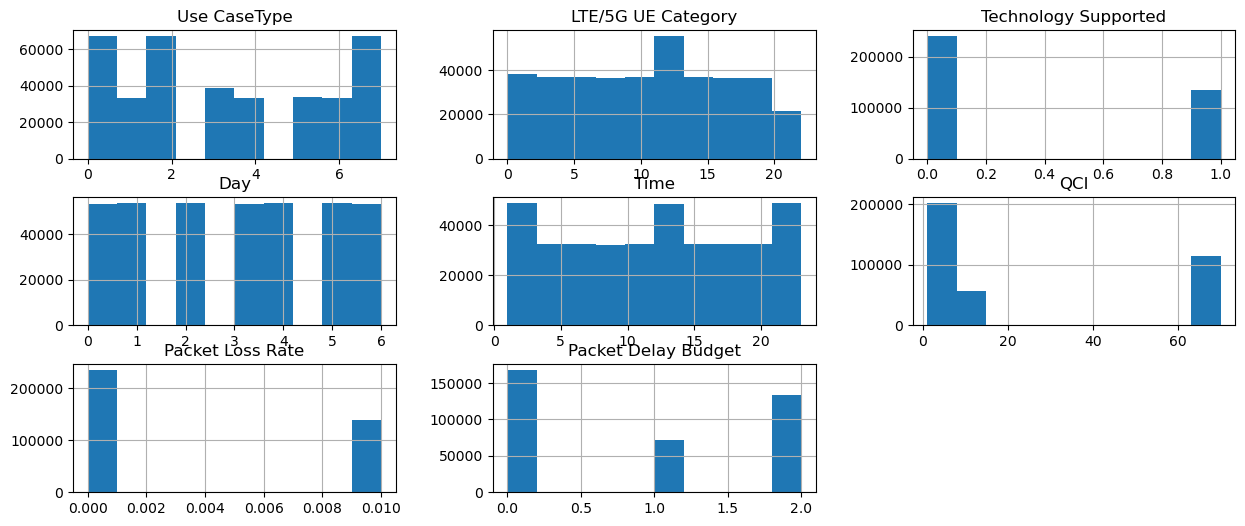

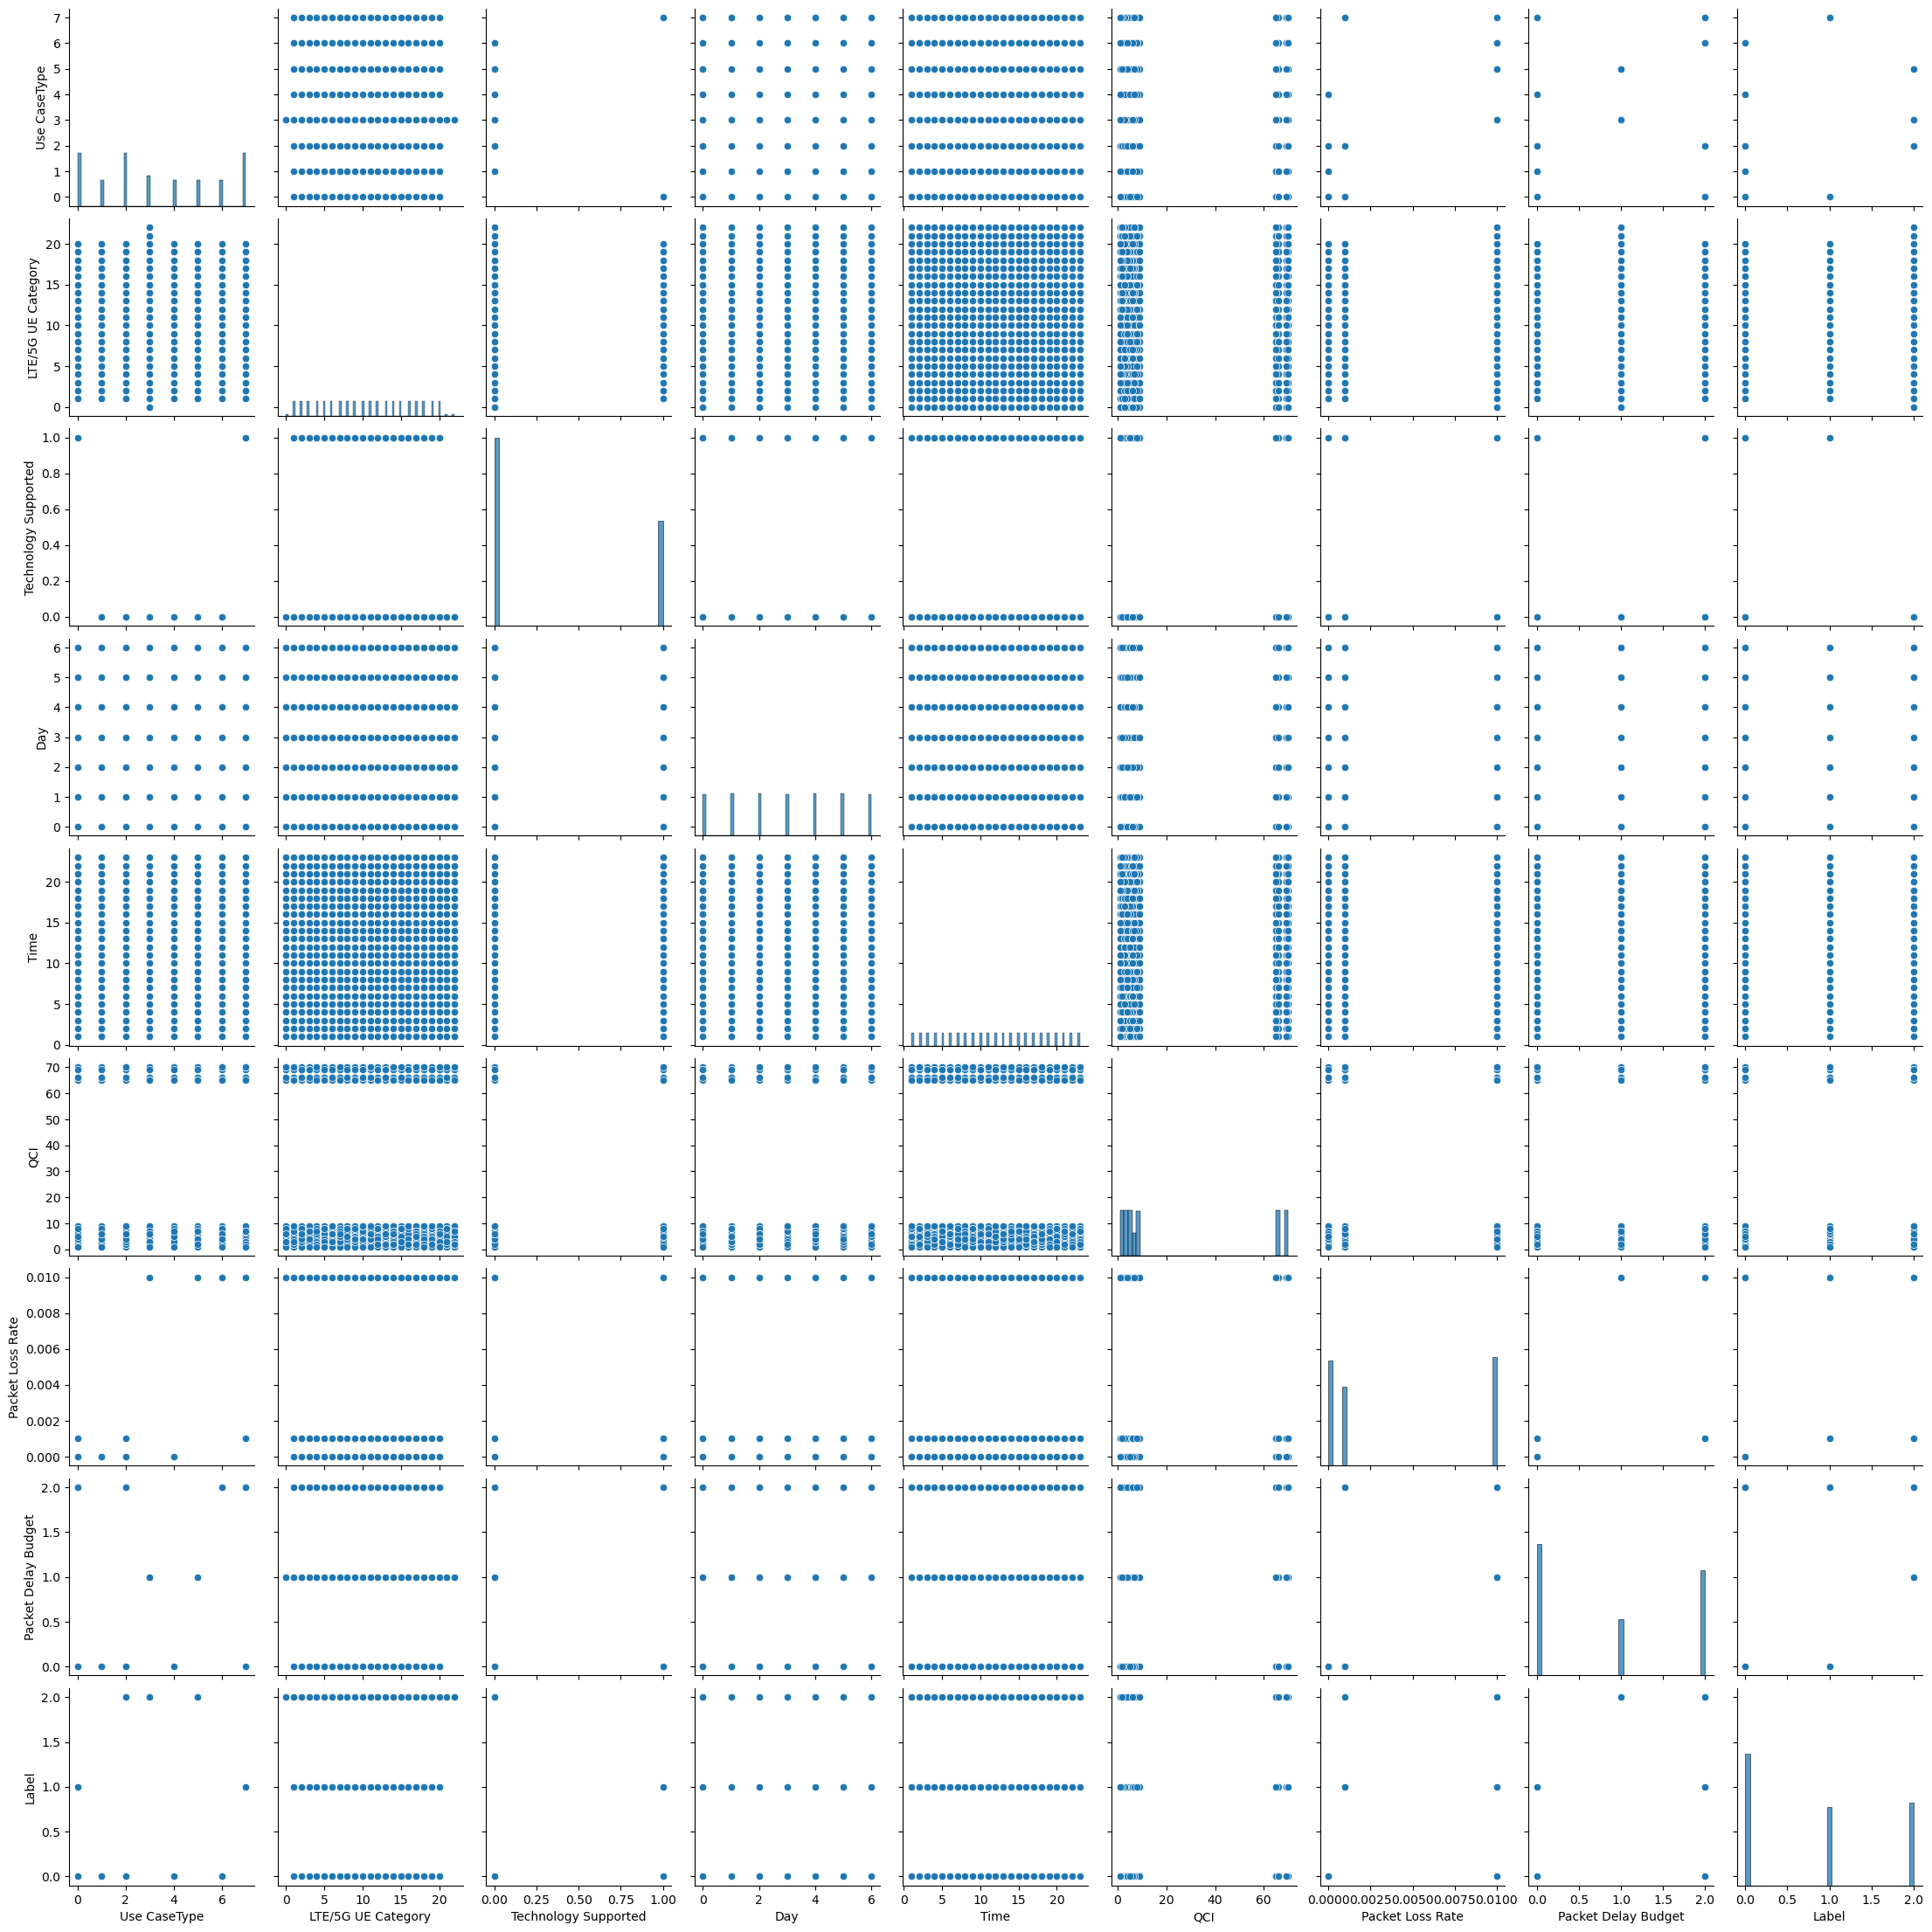

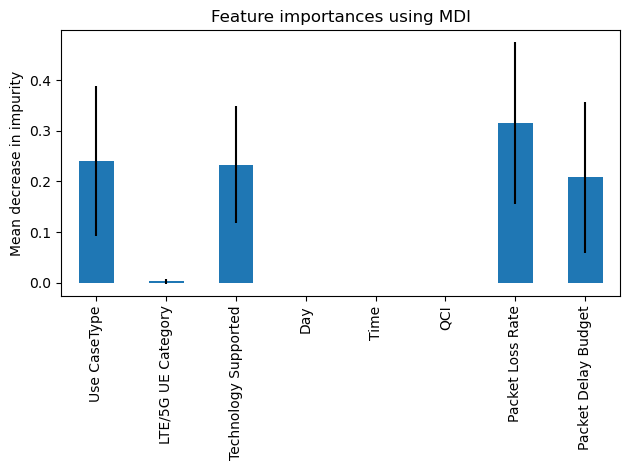

In [13]:
from utils import split_train_test, exploratory_analysis, encode_labels

X_train, X_test, y_train, y_test = split_train_test(df, target_col, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
exploratory_analysis(X_train, y_train_onehot)

In [14]:
from utils import scale_data
scaler, X_train, X_test = scale_data(X_train, X_test)

In [10]:
from utils import classify_random_forest
classify_random_forest(X_train, X_test, y_train_onehot, y_test_onehot)

Train Accuracy: 0.9099844399034792
Test Accuracy: 0.9116317435831512


In [11]:
from utils import classify_svm
classify_svm(X_train, X_test, y_train_onehot, y_test_onehot)

C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train Accuracy: 1.0
Test Accuracy: 1.0




Describing pandas dataframe
                         count       mean        std       min       25%  \
LTE/5G UE Category    373391.0  10.555434   5.863672  0.000000  5.000000   
Technology Supported  373391.0   0.359031   0.479717  0.000000  0.000000   
Day                   373391.0   3.000287   1.998514  0.000000  1.000000   
Time                  373391.0  11.990803   6.631771  1.000000  6.000000   
QCI                   373391.0  24.210766  28.940596  1.000000  4.000000   
Packet Loss Rate      373391.0   0.003996   0.004644  0.000001  0.000001   
Packet Delay Budget   373391.0   0.910488   0.893848  0.000000  0.000000   

                         50%    75%    max  
LTE/5G UE Category    11.000  16.00  22.00  
Technology Supported   0.000   1.00   1.00  
Day                    3.000   5.00   6.00  
Time                  12.000  18.00  23.00  
QCI                    7.000  65.00  70.00  
Packet Loss Rate       0.001   0.01   0.01  
Packet Delay Budget    1.000   2.00   2.00  



C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Prepare random forest importance
Elapsed time to compute the importances: 0.014 seconds


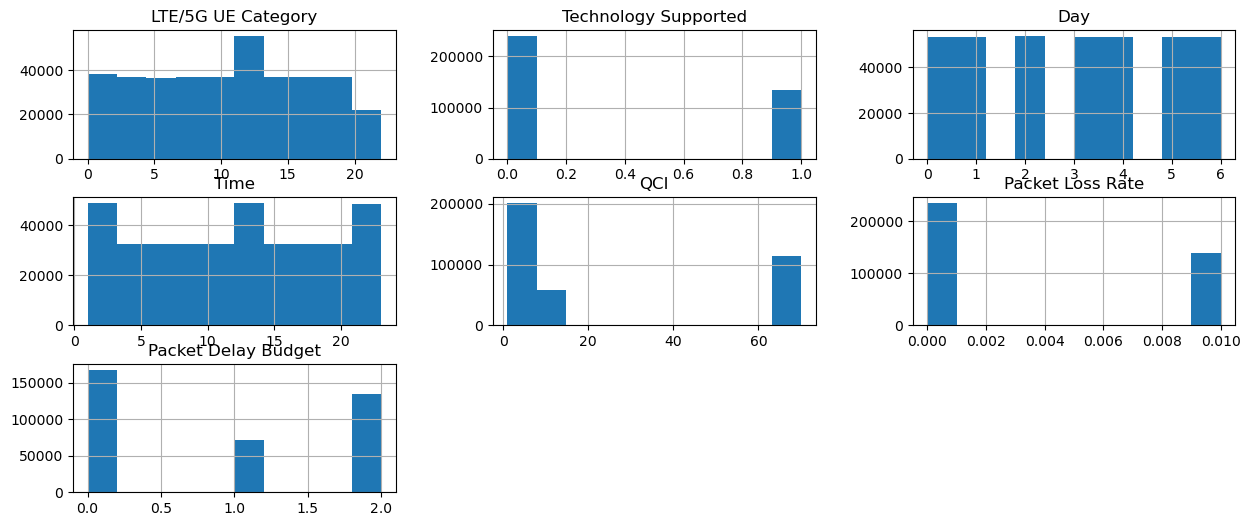

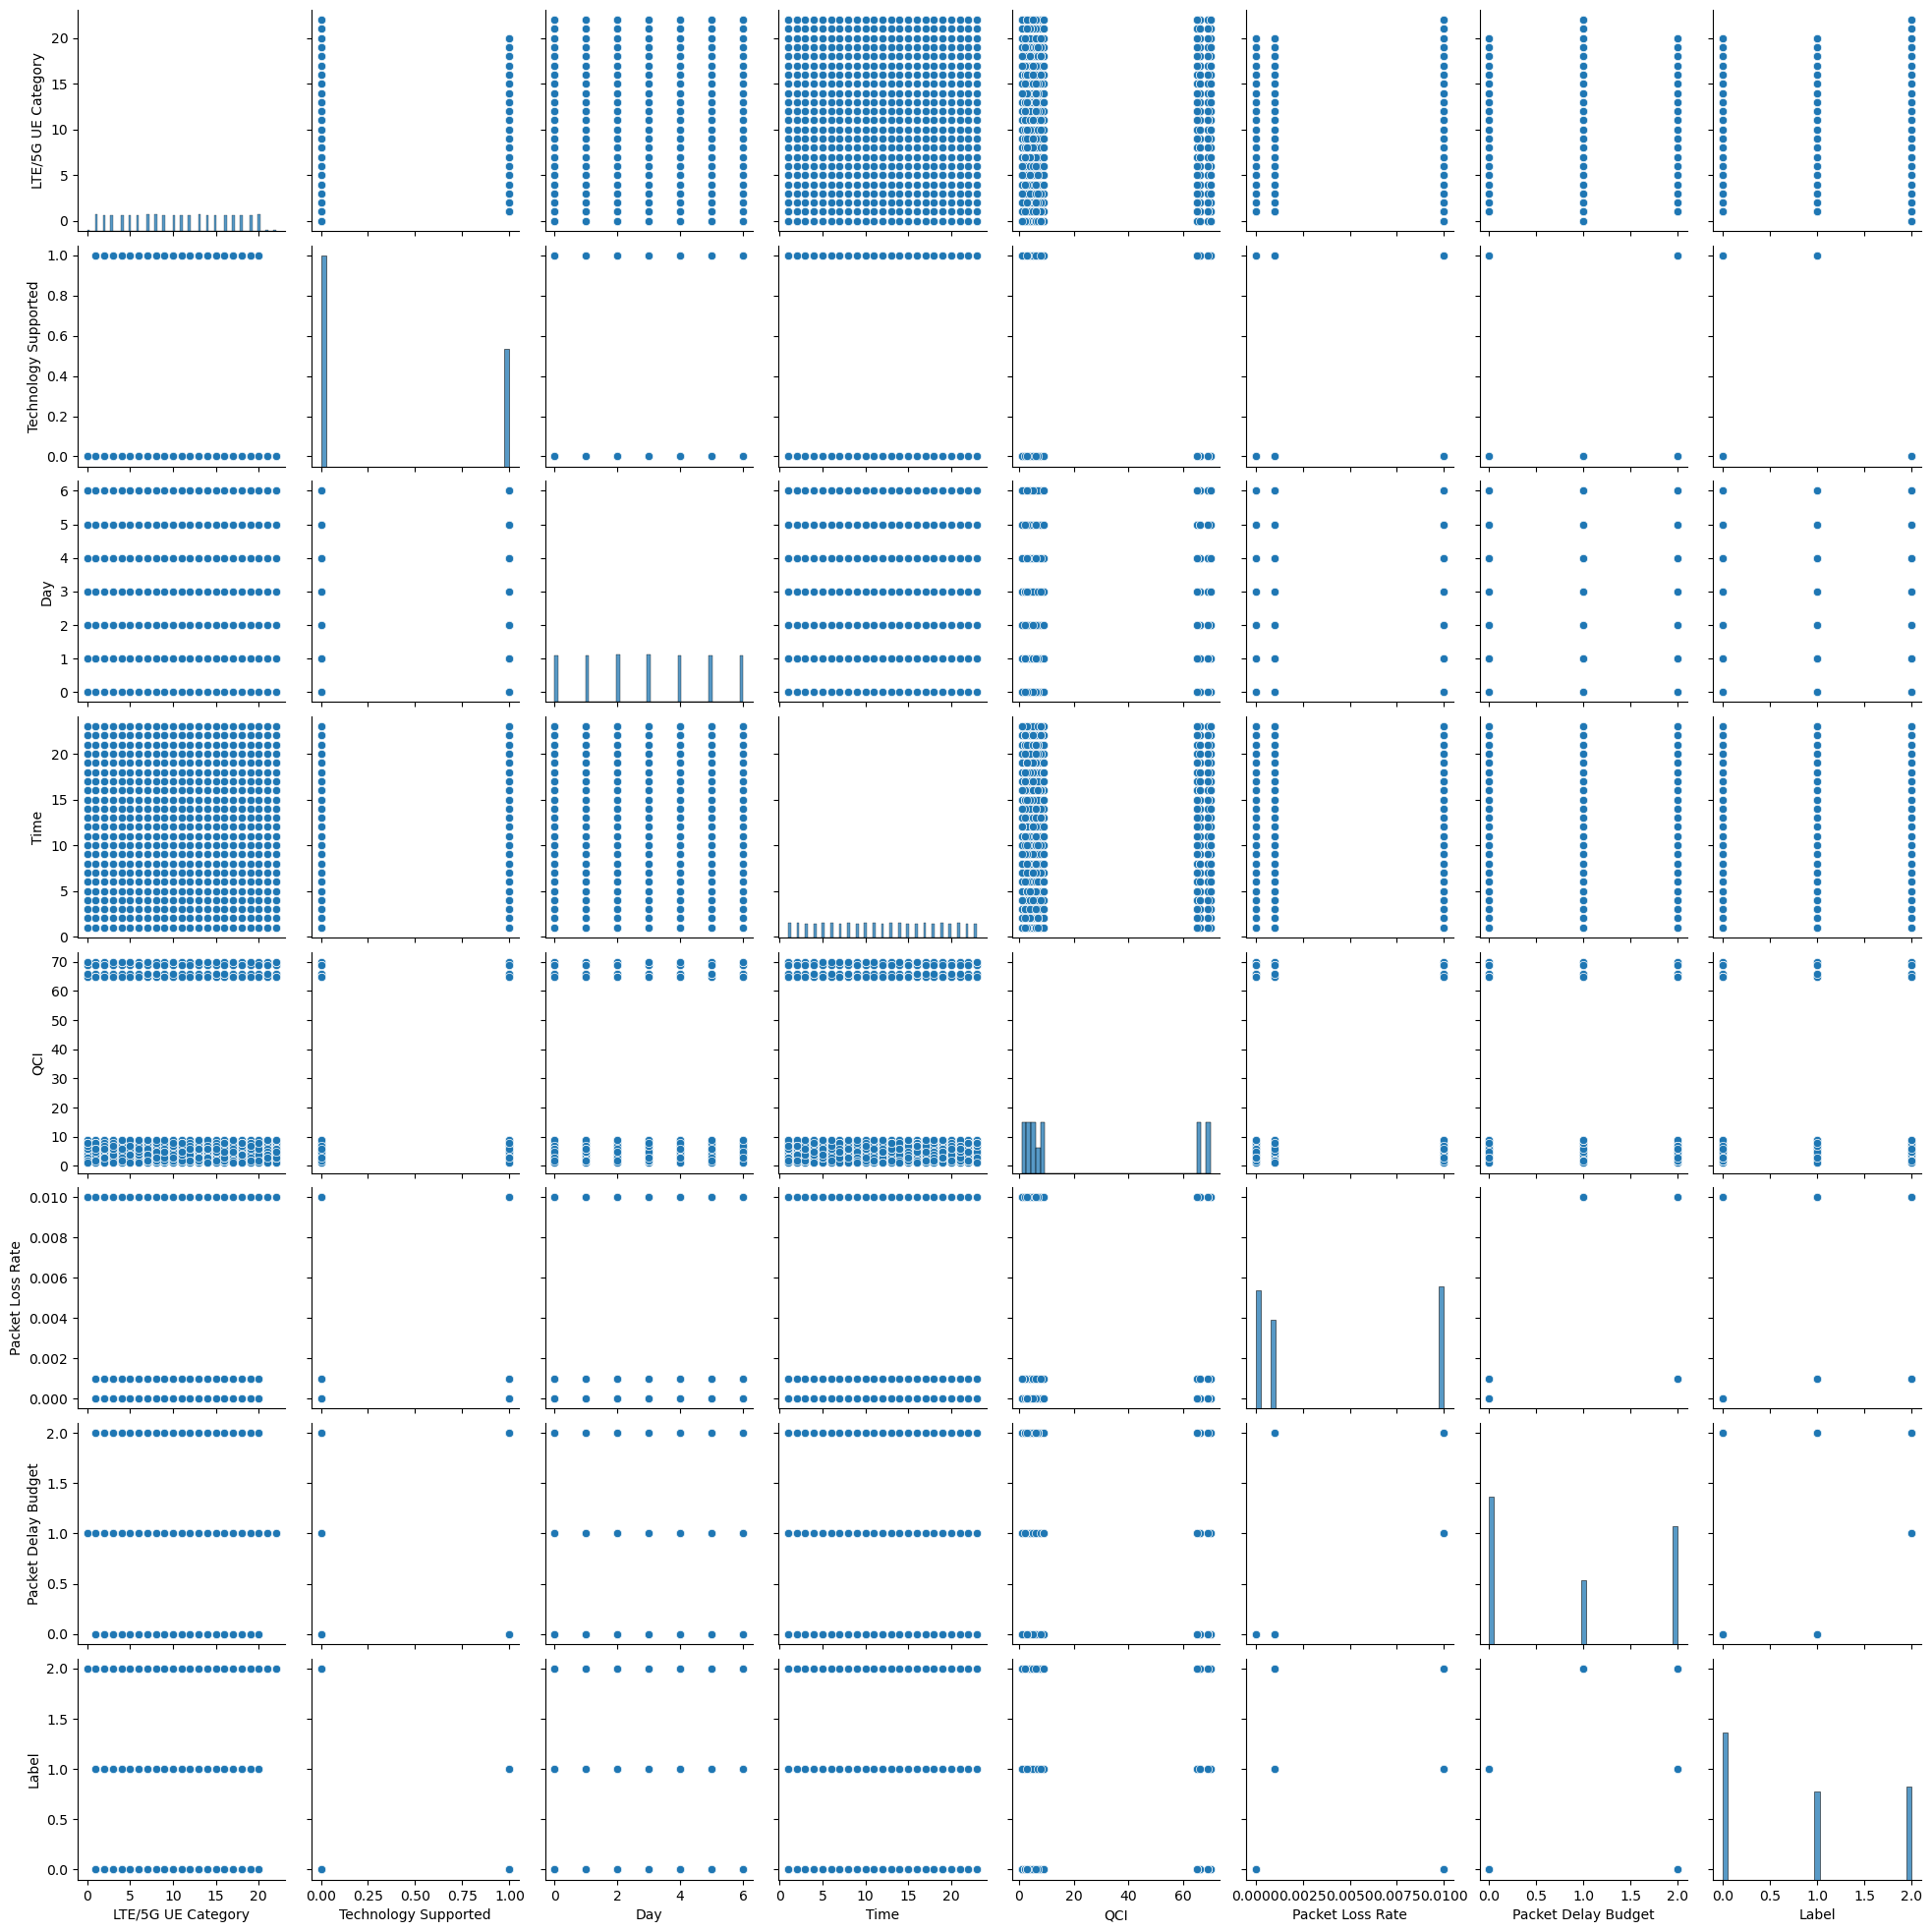

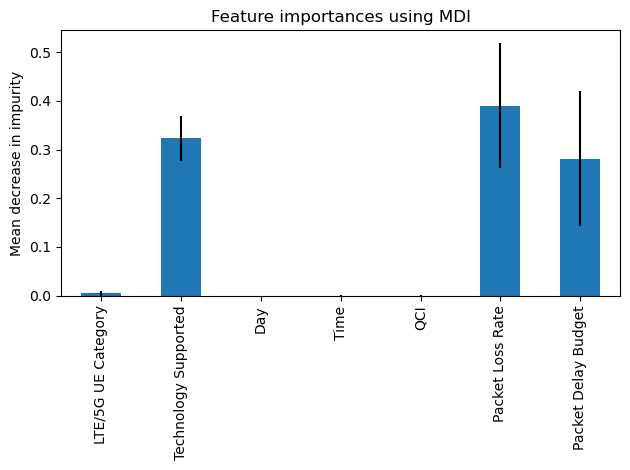

In [15]:
from utils import split_train_test, exploratory_analysis, encode_labels

df_new = df.copy()
df_new.drop(columns=["Use CaseType"], inplace=True)
X_train, X_test, y_train, y_test = split_train_test(df_new, target_col, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
exploratory_analysis(X_train, y_train_onehot)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11669/11669 [==============================] - 32s 3ms/step - loss: 0.3535 - accuracy: 0.8197 - val_loss: 0.2139 - val_accuracy: 0.9087
Epoch 2/10
11669/11669 [==============================] - 31s 3ms/step - loss: 0.1724 - accuracy: 0.9133 - val_loss: 0.1364 - val_accuracy: 0.9346
Epoch 3/10
11669/11669 [==

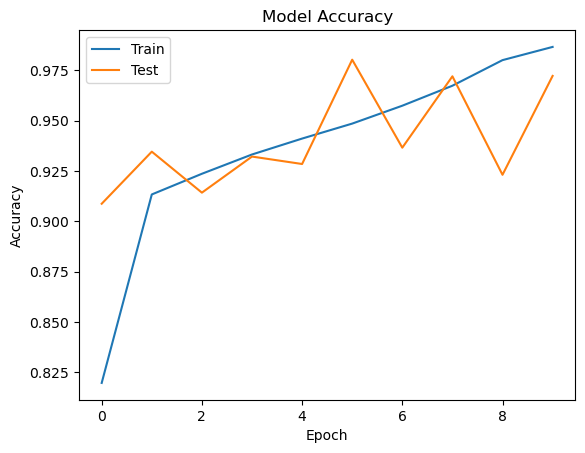

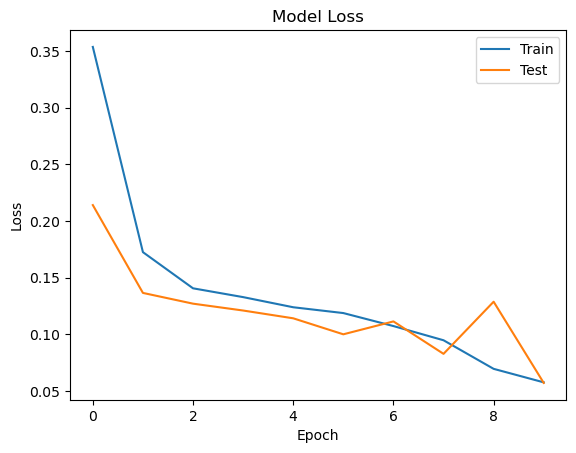

2918/2918 [==============================] - 6s 2ms/step - loss: 0.0570 - accuracy: 0.9722

accuracy: 97.22%


In [16]:
from utils import classify_dnn

classify_dnn(X_train, X_test, y_train, y_test)